## Basics of Primary Data Science Libraries - DataBrains

We're going to go over some of the basics of the main Python libraries that data scientists use. This overview by no means covers everything. 

## Numpy

In data science, we deal a lot with matrices and linear algebra. This is because we're often given a matrix to represent the data itself: the rows of the matrix represent each individual observation in a set of data, and the columns represent a particular feature of the data. We'll get to that more when we get to Pandas.

In [1]:
# importing modules looks like this
import numpy as np

# create a numpy array from a list
lst = [1,2,3]
np_arr = np.array(lst)
np_arr

array([1, 2, 3])

In [2]:
# see the shape of the matrix
# which we see is a column vector
# with 3 entries
# (essentially a matrix with three rows and one column)
print(np_arr.shape) 

(3,)


In [3]:
# now let's create a 3x3 matrix
# must be a list of lists
three_by_three = np.array([[1,2,3],[4,5,6],[7,8,9]])
three_by_three

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

We deal with numpy arrays in similar ways to lists with regards to indexing them. It's like indexing a list of lists.

In [4]:
# get entry in the first row of the third column
three_by_three[0][2]

3

What if you wanted to get the third column of the matrix?
We can also get rows and columns in terms of the following notation:

In [5]:
# all rows of the second column
# slicing just like with lists
three_by_three[:,2]

array([3, 6, 9])

There are a few more complex ways to index things, we just covered the basics. You can find more on this here:
https://github.com/trapatsas/Python-Data-Science-and-Machine-Learning-Bootcamp/blob/master/Python-for-Data-Analysis/NumPy/Numpy%20Indexing%20and%20Selection.ipynb

We can also do operations on numpy arrays, much like we can with matrices. Of course, just like with matrices, the dimensions have to match up properly.

In [6]:
# addition
A = np.array([[1,2],[3,4]])
B = np.array([[4,5],[7,5]])
C = A + B
print("sum: \n {}".format(C))

# multiplication
D = A.dot(B)
print("product: \n {}".format(D))

sum: 
 [[ 5  7]
 [10  9]]
product: 
 [[18 15]
 [40 35]]


Numpy can also be used to generate matrices of zeros, ones, and random numbers sampled from certain distributions:

In [12]:
# matrix of zeros
zeros = np.zeros((3,3))
print("matrix of zeros: \n {}".format(zeros))

# matrix of ones
ones = np.ones((3,3))
print("matrix of ones: \n {}".format(ones))

# matrix of random numbers sampled from
# standard normal distribution (mean 0 and variance 1)
random_normal = np.random.randn(3,3)
print("matrix of random values (sampled from standard ND): \n {}".format(random_normal))

matrix of zeros: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
matrix of ones: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
matrix of random values (sampled from standard ND): 
 [[ 0.07796655  0.28211218  0.55545001]
 [-0.74746461 -0.8894636  -0.59029747]
 [-0.46023027 -0.35748077 -0.07981353]]


These are the basics of Numpy. There are other useful things you can do, including generating an evenly spaced array between two numbers, generating a matrix of numbers sampled from the normal distribution, reshape an array, and more. For a good tutorial/reference guide, go here: https://github.com/trapatsas/Python-Data-Science-and-Machine-Learning-Bootcamp/blob/master/Python-for-Data-Analysis/NumPy/NumPy%20Arrays.ipynb

## Pandas

Like we said before, in data science, we work a lot with data in the form of matrices. However, how would we know what columns correspond to a particular feature? This is where Pandas DataFrames come in. Let's look at this example:

In [7]:
# import pandas
import pandas as pd

df = pd.DataFrame(np.random.randn(5,4),columns='Label1 Label2 Label3 Label4'.split())
df

,Label1,Label2,Label3,Label4
0,1.259835,0.852784,1.578164,-0.555832
1,-1.106229,0.959215,1.406344,-1.190568
2,-0.414445,0.722463,-0.568010,0.759718
3,-0.155531,-1.196732,-1.953683,0.379777
4,-0.257249,0.519819,0.147892,1.666469


What did we do here?

- We created a numpy array that is a 5x4 matrix of random values
- We passed in the column names as a list using the .split() method (the default param is a space)
- We passed these both in as parameters to a Pandas Dataframe

We can do a variety of things with Dataframes. Here are a few:

In [14]:
# select a single column
# returns a series object
print(df['Label1'])

# select a subset of the dataframe
# which is also a dataframe
df[['Label1','Label2']]

0    1.259835
1   -1.106229
2   -0.414445
3   -0.155531
4   -0.257249
Name: Label1, dtype: float64


,Label1,Label2
0,1.259835,0.852784
1,-1.106229,0.959215
2,-0.414445,0.722463
3,-0.155531,-1.196732
4,-0.257249,0.519819


In [15]:
# we can create new columns
# addition
df['Label5'] = df['Label1'] + df['Label2']
df

,Label1,Label2,Label3,Label4,Label5
0,1.259835,0.852784,1.578164,-0.555832,2.112618
1,-1.106229,0.959215,1.406344,-1.190568,-0.147014
2,-0.414445,0.722463,-0.568010,0.759718,0.308018
3,-0.155531,-1.196732,-1.953683,0.379777,-1.352263
4,-0.257249,0.519819,0.147892,1.666469,0.262570


In [18]:
# can apply functions to columns
def square(x):
    return x**2
df['Label6'] = df['Label1'].apply(square)
df

,Label1,Label2,Label3,Label4,Label5,Label6
0,1.259835,0.852784,1.578164,-0.555832,2.112618,1.587183
1,-1.106229,0.959215,1.406344,-1.190568,-0.147014,1.223743
2,-0.414445,0.722463,-0.568010,0.759718,0.308018,0.171765
3,-0.155531,-1.196732,-1.953683,0.379777,-1.352263,0.024190
4,-0.257249,0.519819,0.147892,1.666469,0.262570,0.066177


In [19]:
# easier way to do it using lambda functions (anonymous functions)
df['Label6'] = df['Label1'].apply(lambda x:x**2)
df

,Label1,Label2,Label3,Label4,Label5,Label6
0,1.259835,0.852784,1.578164,-0.555832,2.112618,1.587183
1,-1.106229,0.959215,1.406344,-1.190568,-0.147014,1.223743
2,-0.414445,0.722463,-0.568010,0.759718,0.308018,0.171765
3,-0.155531,-1.196732,-1.953683,0.379777,-1.352263,0.024190
4,-0.257249,0.519819,0.147892,1.666469,0.262570,0.066177


Just like we can index Numpy arrays, we can index Pandas dataframes. We use the .loc method, here's some ways to do it:

In [20]:
# how to select a row
# using .loc
# we need to select by the index
# also returns a series object
df.loc[0]

Label1    1.259835
Label2    0.852784
Label3    1.578164
Label4   -0.555832
Label5    2.112618
Label6    1.587183
Name: 0, dtype: float64

In [22]:
# how to get a particular element
df.loc[0,'Label1']

1.2598346650132635

In [23]:
# how to using slicing to get a subset
# just like in numpy
df.loc[1:,'Label1':'Label4']

,Label1,Label2,Label3,Label4
1,-1.106229,0.959215,1.406344,-1.190568
2,-0.414445,0.722463,-0.568010,0.759718
3,-0.155531,-1.196732,-1.953683,0.379777
4,-0.257249,0.519819,0.147892,1.666469


We can also get subsets of the dataframe using booleans:

In [29]:
# get subsset of dataframe where
# Label2 > 0
df[df['Label2']>0]

,Label1,Label2,Label3,Label4,Label5,Label6
0,1.259835,0.852784,1.578164,-0.555832,2.112618,1.587183
1,-1.106229,0.959215,1.406344,-1.190568,-0.147014,1.223743
2,-0.414445,0.722463,-0.568010,0.759718,0.308018,0.171765
4,-0.257249,0.519819,0.147892,1.666469,0.262570,0.066177


Those are some of the basics of Pandas, some of the things we didn't touch on:

- Reading in a csv/excel file
- Multilevel indexing
- Merging, concatening, and joining
- Dealing with missing data

Really good reference right here: https://github.com/trapatsas/Python-Data-Science-and-Machine-Learning-Bootcamp/tree/master/Python-for-Data-Analysis/Pandas

## Matplotlib

Matplotlib is a data visualization library that is very similar to Matlab's data visualization. Let's do some basic examples:

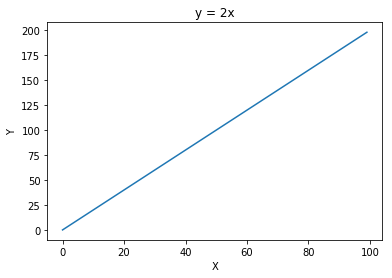

In [31]:
# import the library
import matplotlib.pyplot as plt

# creating a basic plot
# of y = 2x
# we use np.arange, which is very similar to range for lists
X = np.arange(0,100)
y = 2 * X

# plots it as a line (connects all the points)
plt.plot(X,y)

# set the label on X axis
plt.xlabel('X')

# set the label on the Y axis
plt.ylabel('Y')

# title the graph
plt.title('y = 2x')

# need to do this to display the graph
plt.show()

We'll look at a few more functionalities that can be useful:

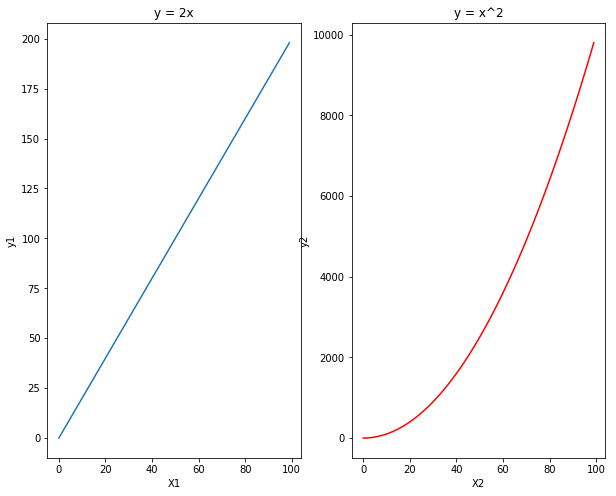

In [40]:
# we can create a figure of subplots like this:

# fig size is (width,height)
fig, axes = plt.subplots(figsize=(10,8),nrows=1,ncols=2)

# axes is a list in this case, but could also be a matrix if it
# were, for example, 2x2

X1 = np.arange(0,100)
y1 = X1 * 2
axes[0].set_xlabel('X1')
axes[0].set_ylabel('y1')
axes[0].set_title('y = 2x')
axes[0].plot(X1,y1)

X2 = np.arange(0,100)
y2 = X2**2
axes[1].set_xlabel('X2')
axes[1].set_ylabel('y2')
axes[1].set_title('y = x^2')

# 'r' means red
axes[1].plot(X2,y2,'r')

plt.show()

We can also do scatterplots and histograms:

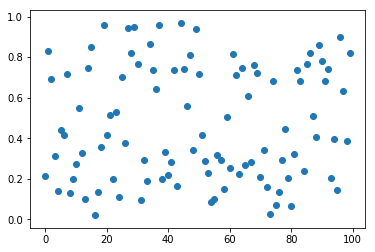

In [46]:
# create random y value for each x value

# scatter plot
X = np.arange(0,100)
y = np.random.rand(100)

plt.scatter(X,y)
plt.show()

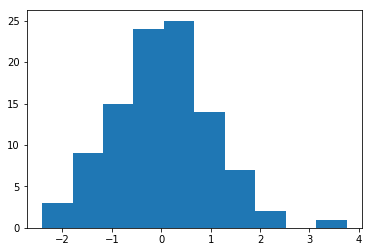

In [47]:
X = np.random.randn(100)
plt.hist(X)
plt.show()

There's definitely more to cover, but this gives you a basic overview: look here for more in-depth examples:
https://github.com/trapatsas/Python-Data-Science-and-Machine-Learning-Bootcamp/tree/master/Python-for-Data-Visualization/Matplotlib

## End